# Loading Libraries

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from sklearn.model_selection import train_test_split

# Data Manipulation

In [117]:
#reading data
data = pd.read_csv("~/OneDrive/Documents/Datakind/DC DHS/Data/InShelterPerDay.csv")
data['date'] = pd.to_datetime(data['date'])
data = data[data['Total']!=0]
data[['MinTempF','MaxTempF', 'SnowIn', 'PrecipIn', 'FreezingAtEntry', 'Total']] = data[['MinTempF','MaxTempF', 'SnowIn', 'PrecipIn', 'FreezingAtEntry', 'Total']].fillna(0)
#data = data.dropna()
data.head()

,date,Total,dayWeek,month,day,year,MinTempF,MaxTempF,SnowIn,PrecipIn,FreezingAtEntry
0,2005-01-01,393,7,1,1,2005,39.92,59.00,0.0,0.000000,0.0
1,2005-01-02,451,1,1,2,2005,39.92,68.00,0.0,0.000000,0.0
2,2005-01-03,466,2,1,3,2005,39.92,46.94,0.0,0.000000,0.0
3,2005-01-04,469,3,1,4,2005,42.08,64.04,0.0,0.031496,0.0
4,2005-01-05,498,4,1,5,2005,46.94,69.08,0.0,0.181102,0.0


In [51]:
#reading data by gender
data_gender = pd.read_csv("~/OneDrive/Documents/Datakind/DC DHS/Data/InShelterPerDayGender.csv")
data_gender['date'] = pd.to_datetime(data_gender['date'])
data_gender['Total_gender'] = data_gender['Female'] + data_gender['Gender Non-Conforming (i.e. not exclusively male or female)'] +\
data_gender['Male'] + data_gender['NA'] + data_gender['Trans Female (MTF or Male to Female)'] + data_gender['Trans Male (FTM or Female to Male)'] + \
data_gender['Transgender']

data_gender = data_gender[data_gender['Total_gender']!=0]
data_gender.head()

,date,Female,Gender Non-Conforming (i.e. not exclusively male or female),Male,NA,Trans Female (MTF or Male to Female),Trans Male (FTM or Female to Male),Transgender,dayWeek,month,day,year,MinTempF,MaxTempF,SnowIn,PrecipIn,FreezingAtEntry,Total_gender
0,2005-01-01,208,0,599,1,0,0,0,7,1,1,2005,39.92,59.00,0.0,0.000000,0.0,808
1,2005-01-02,209,0,647,1,0,0,0,1,1,2,2005,39.92,68.00,0.0,0.000000,0.0,857
2,2005-01-03,203,0,682,1,0,0,0,2,1,3,2005,39.92,46.94,0.0,0.000000,0.0,886
3,2005-01-04,207,0,694,2,0,0,0,3,1,4,2005,42.08,64.04,0.0,0.031496,0.0,903
4,2005-01-05,205,0,735,2,0,0,0,4,1,5,2005,46.94,69.08,0.0,0.181102,0.0,942


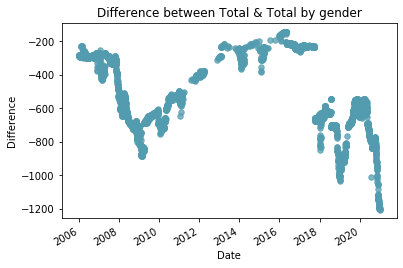

In [55]:
#comparing total data & data by gender
data_merged = data[['date', 'Total']].merge(data_gender[['date', 'Total_gender']], on='date', how='left')
data_merged['Diff'] = data_merged['Total'] - data_merged['Total_gender']    

#plotting difference
fig, ax = plt.subplots()
ax.scatter(data_merged['date'], data_merged['Diff'], s = 30, color = '#539caf', alpha = 0.75)
ax.set_title('Difference between Total & Total by gender')
ax.set_xlabel('Date')
ax.set_ylabel('Difference')
fig.autofmt_xdate()
plt.show()

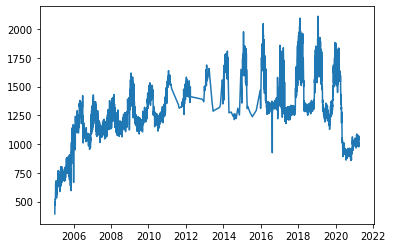

In [32]:
#plotting time series
x = data['date']
y = data['Total']

plt.plot(x,y)
plt.show()

In [118]:
#outlier analysis
data.groupby('year')['Total'].describe()

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
2005,365.0,753.731507,126.076221,393.0,686.00,745.0,808.00,1170.0
2006,365.0,1152.597260,118.556865,667.0,1059.00,1129.0,1240.00,1422.0
2007,365.0,1194.550685,84.999843,1014.0,1131.00,1176.0,1251.00,1428.0
2008,366.0,1223.562842,80.420914,1063.0,1166.25,1212.0,1271.50,1431.0
2009,365.0,1283.145205,122.141776,1088.0,1192.00,1240.0,1360.00,1618.0
2010,365.0,1311.038356,101.209166,1113.0,1233.00,1273.0,1415.00,1533.0
2011,365.0,1387.002740,100.253100,1218.0,1311.00,1345.0,1474.00,1639.0
2012,366.0,1369.226776,76.716632,1232.0,1313.25,1339.0,1418.00,1582.0
2013,365.0,1414.898630,114.347615,1241.0,1333.00,1364.0,1487.00,1712.0


In [119]:
#filtering out data
data = data[~data['year'].isin([2005, 2021])]

# Multivariate Analysis

In [120]:
# https://towardsdatascience.com/multivariate-time-series-forecasting-653372b3db36
model_data = data
model = VAR(model_data[['MinTempF','MaxTempF', 'SnowIn', 'PrecipIn', 'FreezingAtEntry', 'Total']])
model_fit = model.fit()

pred = model_fit.forecast(model_fit.y, steps=1)
print(pred)

[[3.56537135e+01 5.25751436e+01 6.15036806e-02 8.98815792e-02
  5.38474902e-01 1.00926321e+03]]


C:\Users\Citrix\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Citrix\anaconda3\lib\site-packages\statsmodels\base\wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


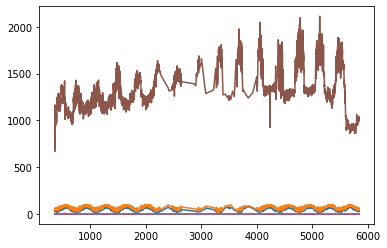

In [100]:
#step 1 : plotting data points
plt.plot(model_data[['MinTempF','MaxTempF', 'SnowIn', 'PrecipIn', 'FreezingAtEntry', 'Total']])

In [121]:
#step2 : Test for causality
from statsmodels.tsa.stattools import grangercausalitytests
granger_test = sm.tsa.stattools.grangercausalitytests(model_data[['MinTempF','MaxTempF', 'SnowIn', 'PrecipIn', 'FreezingAtEntry', 'Total']], maxlag=30)
granger_test


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=287.3138, p=0.0000  , df_denom=5471, df_num=1
ssr based chi2 test:   chi2=287.6814, p=0.0000  , df=1
likelihood ratio test: chi2=280.3819, p=0.0000  , df=1


ValueError: wrong shape for coefs

In [122]:
#step 3: Splitting the data
X_train, X_test = train_test_split(model_data , test_size=0.33,  shuffle=False)

In [123]:
#step 4: Check for stationarity
# Augmented Dickey-Fuller Test (ADF Test)/unit root test
from statsmodels.tsa.stattools import adfuller
def adf_test(ts, signif=0.05):
    dftest = adfuller(ts, autolag='AIC')
    adf = pd.Series(dftest[0:4], index=['Test Statistic','p-value','# Lags','# Observations'])
    for key,value in dftest[4].items():
       adf['Critical Value (%s)'%key] = value
    print (adf)
    
    p = adf['p-value']
    if p <= signif:
        print(f" Series is Stationary")
    else:
        print(f" Series is Non-Stationary")
#apply adf test on the series
adf_test(X_train["MinTempF"])
adf_test(X_train["MaxTempF"])
adf_test(X_train["SnowIn"])
adf_test(X_train["PrecipIn"])
adf_test(X_train["FreezingAtEntry"])
adf_test(X_train["Total"])


Test Statistic            -3.856915
p-value                    0.002376
# Lags                    16.000000
# Observations          3653.000000
Critical Value (1%)       -3.432141
Critical Value (5%)       -2.862332
Critical Value (10%)      -2.567191
dtype: float64
 Series is Stationary
Test Statistic            -4.069894
p-value                    0.001086
# Lags                    20.000000
# Observations          3649.000000
Critical Value (1%)       -3.432143
Critical Value (5%)       -2.862332
Critical Value (10%)      -2.567192
dtype: float64
 Series is Stationary
Test Statistic           -32.539273
p-value                    0.000000
# Lags                     2.000000
# Observations          3667.000000
Critical Value (1%)       -3.432135
Critical Value (5%)       -2.862329
Critical Value (10%)      -2.567190
dtype: float64
 Series is Stationary
Test Statistic           -31.992999
p-value                    0.000000
# Lags                     2.000000
# Observations          3

In [ ]:
#Step 5: making series stationary
#since the series is stationary, no need to make it stationary

In [137]:
#step 6: fitting the model
model = VAR(X_train[['MinTempF', "Total"]])
results = model.fit(maxlags=365, ic='aic')
results.summary()

C:\Users\Citrix\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 06, Oct, 2021
Time:                     12:50:32
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    11.9985
Nobs:                     3601.00    HQIC:                   11.6910
Log likelihood:          -30684.2    FPE:                    100787.
AIC:                      11.5207    Det(Omega_mle):         93434.7
--------------------------------------------------------------------
Results for equation MinTempF
                  coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------
const                6.292277         2.470990            2.546           0.011
L1.MinTempF          0.474583         0.017060           27.818           0.000
L1.Total            -0.047666         0.004713          -10.1

In [138]:
#step 7: forecasting
lag_order = results.k_ar
forecast = results.forecast(model_data[['MinTempF', "Total"]].values[-lag_order:], len(X_test))
print(forecast.shape)

(1809, 2)


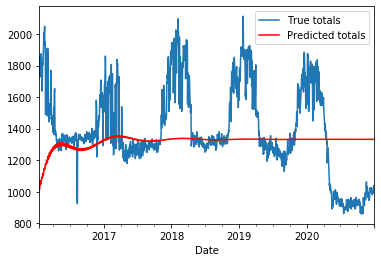

In [139]:
# plotting forecasts
predictions = pd.DataFrame(data = forecast, columns = ['MinTempF', "Total"])

comparison = pd.DataFrame()
comparison['Date'] = X_test['date']
comparison['True totals'] = X_test['Total']
comparison = comparison.reset_index()
comparison['Predicted totals'] = predictions['Total']
comparison.head()

ax = plt.gca()

comparison.plot(kind='line',x='Date',y='True totals',ax=ax)
comparison.plot(kind='line',x='Date',y='Predicted totals', color='red', ax=ax)

plt.show()

In [127]:
comparison.to_csv("multivariateforecast.csv")